# DonorsChoose

##### <p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('C:/Users/PURNIMA/Documents/AI/Donors choose/train_data.csv')
resource_data = pd.read_csv('C:/Users/PURNIMA/Documents/AI/Donors choose/resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [6]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

  project_subject_categories            project_subject_subcategories  \
0             Math & Science  Applied Sciences, Health & Life Science   
1              Special Needs                            Special Needs   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity  
0         4  
1         8

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +' '+\
                        project_data["project_essay_2"].map(str) + ' '+\
                        project_data["project_essay_3"].map(str) + ' '+\
                        project_data["project_essay_4"].map(str)
#Some projects have no 3rd and 4th eassay. So those projects have NaN values in that rows. 
#we want we can remove it later either by considering it as stop word or using regular expression.

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[48999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons. My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students. Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, 

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub('nan','',phrase) #Removing nan from each essay.
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[1000])
print(sent)
print("="*50)

\"Life moves pretty fast. If you do not stop and look around once in awhile, you could miss it.\"  from the movie, Ferris Bueller is Day Off.  Think back...what do you remember about your grandparents?  How amazing would it be to be able to flip through a book to see a day in their lives? My second graders are voracious readers! They love to read both fiction and nonfiction books.  Their favorite characters include Pete the Cat, Fly Guy, Piggie and Elephant, and Mercy Watson. They also love to read about insects, space and plants. My students are hungry bookworms! My students are eager to learn and read about the world around them. My kids love to be at school and are like little sponges absorbing everything around them. Their parents work long hours and usually do not see their children. My students are usually cared for by their grandparents or a family friend. Most of my students do not have someone who speaks English at home. Thus it is difficult for my students to acquire language

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 Life moves pretty fast. If you do not stop and look around once in awhile, you could miss it.   from the movie, Ferris Bueller is Day Off.  Think back...what do you remember about your grandparents?  How amazing would it be to be able to flip through a book to see a day in their lives? My second graders are voracious readers! They love to read both fiction and nonfiction books.  Their favorite characters include Pete the Cat, Fly Guy, Piggie and Elephant, and Mercy Watson. They also love to read about insects, space and plants. My students are hungry bookworms! My students are eager to learn and read about the world around them. My kids love to be at school and are like little sponges absorbing everything around them. Their parents work long hours and usually do not see their children. My students are usually cared for by their grandparents or a family friend. Most of my students do not have someone who speaks English at home. Thus it is difficult for my students to acquire language. 

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 Life moves pretty fast If you do not stop and look around once in awhile you could miss it from the movie Ferris Bueller is Day Off Think back what do you remember about your grandparents How amazing would it be to be able to flip through a book to see a day in their lives My second graders are voracious readers They love to read both fiction and nonfiction books Their favorite characters include Pete the Cat Fly Guy Piggie and Elephant and Mercy Watson They also love to read about insects space and plants My students are hungry bookworms My students are eager to learn and read about the world around them My kids love to be at school and are like little sponges absorbing everything around them Their parents work long hours and usually do not see their children My students are usually cared for by their grandparents or a family friend Most of my students do not have someone who speaks English at home Thus it is difficult for my students to acquire language Now think forward would not i

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
#https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.remove('not')
stopwords.remove('no')
stopwords.remove('nor')

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [02:09<00:00, 843.36it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
print(project_data['project_title'].values[9])
print(project_data['project_title'].values[29877])
print(project_data['project_title'].values[8607])

Dash and Dot Robotic Duo Needed
Dancing Our Way to Healthy Choices
Move and Groove...Outside Play


In [19]:
preprocessed_title = []
for title in tqdm(project_data['project_title'].values):
    title = decontracted(title)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(e for e in title.split() if e.lower() not in stopwords)
    preprocessed_title.append(title.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:05<00:00, 19035.38it/s]


In [20]:
#after preprocessing title
preprocessed_title[29877]

'dancing way healthy choices'

<h2><font color='red'> 1.5 Preprocessing of `project_resource_summary`</font></h2>

In [21]:
print(project_data['project_resource_summary'].values[9])
print(project_data['project_resource_summary'].values[29877])
print(project_data['project_resource_summary'].values[8647])

My students need a Dash & Dot Pack and Wonder Pack to explore the possibilities of coding for beginners.
My students need a boombox, Ipad and case to perform to help them increase their movement throughout the day.
My students need durable instruments that they can use and take home to practice to increase their ability to play music


In [22]:
preprocessed_summary = []
for t in tqdm(project_data['project_resource_summary'].values):
    t = decontracted(t)
    t = t.replace('\\r', ' ')
    t = t.replace('\\"', ' ')
    t = t.replace('\\n', ' ')
    t = re.sub('[^A-Za-z0-9]+', ' ', t)
    t = ' '.join(e for e in t.split() if e.lower() not in stopwords)
    preprocessed_summary.append(t.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:13<00:00, 8018.28it/s]


In [23]:
#after preprocessing title
preprocessed_summary[29877]

'students need boombox ipad case perform help increase movement throughout day'

**After preprocessing of text we will replace original text columns with preprocessed one from our sampled dataframe.**

In [24]:
project_data.drop(['project_essay_1','project_essay_2', 'project_essay_3', 'project_essay_4'], axis = 1,inplace=True)
project_data['essay'] = preprocessed_essays
project_data['project_title'] = preprocessed_title
project_data['project_resource_summary'] = preprocessed_summary

In [26]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                         project_title  \
0  engineering steam primary classroom   
1                  sensory tools focus   

                            project_resource_summary  \
0  students need stem kits learn critical science...   
1  students need boogie boards quiet sensory brea...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  fortunate enough use fairy tale stem kits clas...  
1  imagine 8 9 years old third grade classroom se...

## 1.6 Preparing data for models

In [27]:
print(project_data.shape)
print(project_data.columns)

(109248, 16)
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'essay'],
      dtype='object')


we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical
      
We will drop ['Unnamed: 0', 'id', 'teacher_id','Date']

In [28]:
project_data.drop(['Unnamed: 0', 'id', 'teacher_id','Date'],axis=1,inplace=True)
print(project_data.shape)
print(project_data.columns)

(109248, 12)
Index(['teacher_prefix', 'school_state', 'project_grade_category',
       'project_title', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'essay'],
      dtype='object')


In [29]:
project_data.isnull().sum() #Presence of null value

teacher_prefix                                  3
school_state                                    0
project_grade_category                          0
project_title                                   0
project_resource_summary                        0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
price                                           0
quantity                                        0
clean_categories                                0
clean_subcategories                             0
essay                                           0
dtype: int64

There is 1 missing value in teacher_prefix column. We will impute it with most frequently occuring values in that respective column.

In [30]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
project_data['teacher_prefix'].fillna(project_data['teacher_prefix'].mode()[0],inplace = True)
project_data['teacher_prefix'].isnull().sum()

0

In [31]:
#Rather than restarting all notebook cells(which is very time consuming), we will save notebook session using dill library.
# Saving jupyter notebook session https://stackoverflow.com/a/50985430/8107740
import dill
dill.dump_session('preprocessed_data.db')
#We can also use pickle module for object serializtion, but I will give dill library a try as dill is an extension to pickle:) 

In [1]:
import dill
dill.load_session('preprocessed_data.db')

<h3><font color = 'blue'>Separating independent and dependent variables.</font></h3>

In [2]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis = 1,inplace=True)
X = project_data

In [3]:
X.head(2)

teacher_prefix school_state project_grade_category  \
0           Mrs.           CA          Grades PreK-2   
1            Ms.           UT             Grades 3-5   

                         project_title  \
0  engineering steam primary classroom   
1                  sensory tools focus   

                            project_resource_summary  \
0  students need stem kits learn critical science...   
1  students need boogie boards quiet sensory brea...   

   teacher_number_of_previously_posted_projects   price  quantity  \
0                                            53  725.05         4   
1                                             4  213.03         8   

  clean_categories                 clean_subcategories  \
0     Math_Science  AppliedSciences Health_LifeScience   
1     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  fortunate enough use fairy tale stem kits clas...  
1  imagine 8 9 years old third grade classroom se...

<font color='Teal'> For Clustering purpose we don't need target variable. Also applying clustering algorithm is computationally expensive so we will sample 50k data points from whole dataset. </font>
<h2>Sampling 50k data points<h2 

In [4]:
from sklearn.utils import resample
X = resample(X,n_samples = 50000, replace=False)

In [5]:
y = y[list(X.index)] #Selecting the corresponding y for later use

In [6]:
X.head(2)

teacher_prefix school_state project_grade_category  \
59098           Mrs.           MN          Grades PreK-2   
22391           Mrs.           CA             Grades 3-5   

                   project_title  \
59098  first part last part read   
22391          relay races twist   

                                project_resource_summary  \
59098  students need magnetic letters manipulate word...   
22391  students need foam pogo jumpers agility rings ...   

       teacher_number_of_previously_posted_projects   price  quantity  \
59098                                             0   57.07         7   
22391                                            32  124.39        37   

        clean_categories          clean_subcategories  \
59098  Literacy_Language  Literacy Literature_Writing   
22391      Health_Sports       Gym_Fitness TeamSports   

                                                   essay  
59098  students come classroom vibrant mix cultures r...  
22391  teach low socio economic neighborhood students...

## 2.1 Make Data Model Ready : encoding categorical features

<h3><font color='magenta'>One hot encoding: 'clean_categories'</font>

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)
categories = vectorizer.fit_transform(X['clean_categories'].values)

feature_categories = vectorizer.get_feature_names()

print('Shape of matrix after vectorization')
print(categories.shape)

print('Features: ', feature_categories)

Shape of matrix after vectorization
(50000, 9)
Features:  ['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


<h3><font color='magenta'>One hot encoding: 'clean_subcategories'</font>

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)
subcategories = vectorizer.fit_transform(X['clean_subcategories'].values)

feature_subcategories = vectorizer.get_feature_names()

print('Shape of matrix after vectorization')
print(subcategories.shape)

print('Features: ', feature_subcategories)

Shape of matrix after vectorization
(50000, 30)
Features:  ['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


<h3><font color='magenta'>One hot encoding: school_state</font>

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)
school_state = vectorizer.fit_transform(X['school_state'].values)

feature_school_state = vectorizer.get_feature_names()

print('Shape of matrix after vectorization')
print(school_state.shape)

print('Features: ', feature_school_state)

Shape of matrix after vectorization
(50000, 51)
Features:  ['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h3><font color='magenta'>One hot encoding: teacher_prefix</font>

In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
teacher_prefix = ohe.fit_transform(X['teacher_prefix'].values.reshape(-1,1))

feature_teacher_prefix = ohe.get_feature_names()

print('Shape of matrix after vectorization')
print(teacher_prefix.shape)

print('Features: ', feature_teacher_prefix)

Shape of matrix after vectorization
(50000, 5)
Features:  ['x0_Dr.' 'x0_Mr.' 'x0_Mrs.' 'x0_Ms.' 'x0_Teacher']


<h3><font color='magenta'>One hot encoding: project_grade_category</font>

In [11]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
grade = ohe.fit_transform(X['project_grade_category'].values.reshape(-1,1))

feature_grade_category = ohe.get_feature_names()

print('Shape of matrix after vectorization')
print(grade.shape)

print('Features: ', feature_grade_category)

Shape of matrix after vectorization
(50000, 4)
Features:  ['x0_Grades 3-5' 'x0_Grades 6-8' 'x0_Grades 9-12' 'x0_Grades PreK-2']


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

Vectorizing text data using Bag of Word(BOW).

<h3><font color='magenta'>Bag of words: 'essay'</font>

In [12]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X['essay'].values) 

essay_bow = vectorizer.transform(X['essay'].values)

feature_essay_bow = vectorizer.get_feature_names()

print(essay_bow.shape)
print('Some features: ', feature_essay_bow[120:135])

(50000, 5000)
Some features:  ['able work', 'absolutely', 'absolutely love', 'absorb', 'abstract', 'academic', 'academic achievement', 'academic areas', 'academic excellence', 'academic needs', 'academic performance', 'academic skills', 'academic social', 'academic success', 'academically']


<h3><font color='magenta'>Bag of words: 'project_title'</font>

In [13]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=1000)
vectorizer.fit(X['project_title'].values) # fit has to happen only on train data

title_bow = vectorizer.transform(X['project_title'].values)

feature_title_bow = vectorizer.get_feature_names()

print(title_bow.shape)
print('Some features: ', feature_title_bow[20:35])

(50000, 1000)
Some features:  ['6th', 'academic', 'access', 'accessible', 'achieve', 'achievement', 'action', 'active', 'active bodies', 'active learners', 'active learning', 'active minds', 'active seating', 'active students', 'activities']


## Merging all features for BOW Set
Categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)<br>

In [14]:
from scipy.sparse import hstack
X_train = hstack((categories, subcategories, teacher_prefix, school_state, grade,     #categorical
                     X[['price']], X[['quantity']], X[['teacher_number_of_previously_posted_projects']], #numerical
                     essay_bow, title_bow)) #text

In [15]:
print(X_train.shape)

(50000, 6102)


Shape of the data that has to clustered in similar group is (50000, 6102). As the dimension of this data is 6102 so there is need of applying dimensionality reduction.

In [16]:
from sklearn.feature_selection import SelectKBest,f_classif
best = SelectKBest(f_classif, k= 5000)
X_train = best.fit_transform(X_train, y)

In [17]:
print('Shape of new matrix after dimension reduction:', X_train.shape)

Shape of new matrix after dimension reduction: (50000, 5000)


In [18]:
#Saving data in pickle file
with open('X_train.pickle','wb') as f:
    pickle.dump(X_train, f)
    
with open('y.pickle','wb') as f:
    pickle.dump(y, f)

## 2.4 Applying KMeans

In [19]:
import pickle

with open('X_train.pickle','rb') as f:
    data = pickle.load(f)

First we will find best no. of clusters(k) that can group our data well, by using elbow plot(k vs inertia_).

In [20]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1,12):
    model = KMeans(n_clusters= k, n_jobs=-1, random_state= 42)
    model.fit(data)
    inertia.append(model.inertia_)

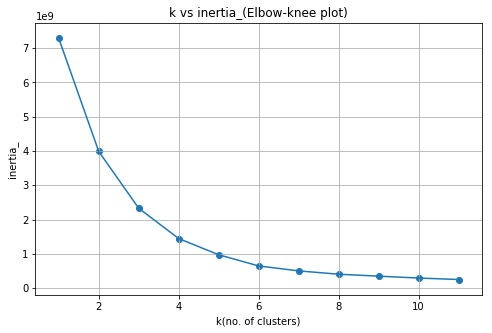

In [23]:
#Plot for finding best number of k(number of clusters)
plt.figure(figsize=(8,5))
plt.plot(range(1,12), inertia)
plt.scatter(range(1,12), inertia)
plt.title("k vs inertia_(Elbow-knee plot)")
plt.xlabel('k(no. of clusters)')
plt.ylabel('inertia_')
plt.grid();

From above plot, best number of cluster(k) seems to be 5. As for k>5 there is not much decline in inertia(sum of squared distance of points to there closest centroid). Next we will retrain KMeans for 5 clusters.

In [24]:
model = KMeans(n_clusters=5, n_jobs=-1, random_state=42)
model.fit(data)  #Kmeans with best number of clusters.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [25]:
import dill
dill.dump_session('kmeans.db')

<h3> <font color='indigo'>  2.4.1 Manually observing few points from each cluster.</h3>

As we have grouped/clustered our data into 5 clusters using Kmeans algorithm. Now we will perform some simple exploratory data analysis(EDA) on these grouped data to know what common properties is shared by data points in each clusters.
https://kite.com/blog/python/data-analysis-visualization-python

In [2]:
label = model.labels_
label

array([1, 1, 1, ..., 1, 4, 4])

We will add label predicted by kmeans model to the actual dataset X.

In [3]:
X = X.copy() # to avoid SettingWithCopyWarning

In [4]:
X['Label'] = label
X.head(4)

teacher_prefix school_state project_grade_category  \
59098           Mrs.           MN          Grades PreK-2   
22391           Mrs.           CA             Grades 3-5   
60154           Mrs.           CT            Grades 9-12   
24559           Mrs.           NC             Grades 3-5   

                                        project_title  \
59098                       first part last part read   
22391                               relay races twist   
60154  dvd players support visual learners curriculum   
24559         peddling playing way higher achievement   

                                project_resource_summary  \
59098  students need magnetic letters manipulate word...   
22391  students need foam pogo jumpers agility rings ...   
60154  students need visual instruction curriculum su...   
24559  students need exercise peddlers desks playgrou...   

       teacher_number_of_previously_posted_projects   price  quantity  \
59098                                             0   57.07         7   
22391                                            32  124.39        37   
60154                                             4   34.99         5   
24559                                            32   87.52        46   

                       clean_categories                   clean_subcategories  \
59098                 Literacy_Language           Literacy Literature_Writing   
22391                     Health_Sports                Gym_Fitness TeamSports   
60154  History_Civics Literacy_Language  History_Geography Literature_Writing   
24559                     Health_Sports            Health_Wellness TeamSports   

                                                   essay  Label  
59098  students come classroom vibrant mix cultures r...      1  
22391  teach low socio economic neighborhood students...      1  
60154  one two library media specialists oversee audi...      1  
24559  know definitely difficulty sitting still defin...      1

In [5]:
#Separating/creating a new dataframe to store all clusters separately
cluster0 = X.loc[X.Label==0,:]
cluster1 = X.loc[X.Label==1,:]
cluster2 = X.loc[X.Label==2,:]
cluster3 = X.loc[X.Label==3,:]
cluster4 = X.loc[X.Label==4,:]

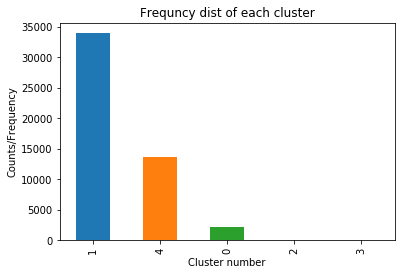

In [6]:
#Counting number of data points belonging to each clusters and creation bat plot.
X['Label'].value_counts().plot.bar(title = 'Frequncy dist of each cluster')
plt.xlabel('Cluster number')
plt.ylabel('Counts/Frequency')
plt.show()

From the bar plot, most of the data point/ observations belong to cluster 1. Also it seems like no points belong to cluster 2 and cluster 3. Hence we will see at the numerical count wrt to each cluster.

In [7]:
pd.DataFrame([X['Label'].value_counts(),X['Label'].value_counts(normalize=True)],index=['count','proportion'])

1            4           0          2         3
count       33955.0000  13618.00000  2271.00000  132.00000  24.00000
proportion      0.6791      0.27236     0.04542    0.00264   0.00048

Very few proportion of points belong to cluster 2(0.2%) and cluster 3(0.04%).
### Analysing price

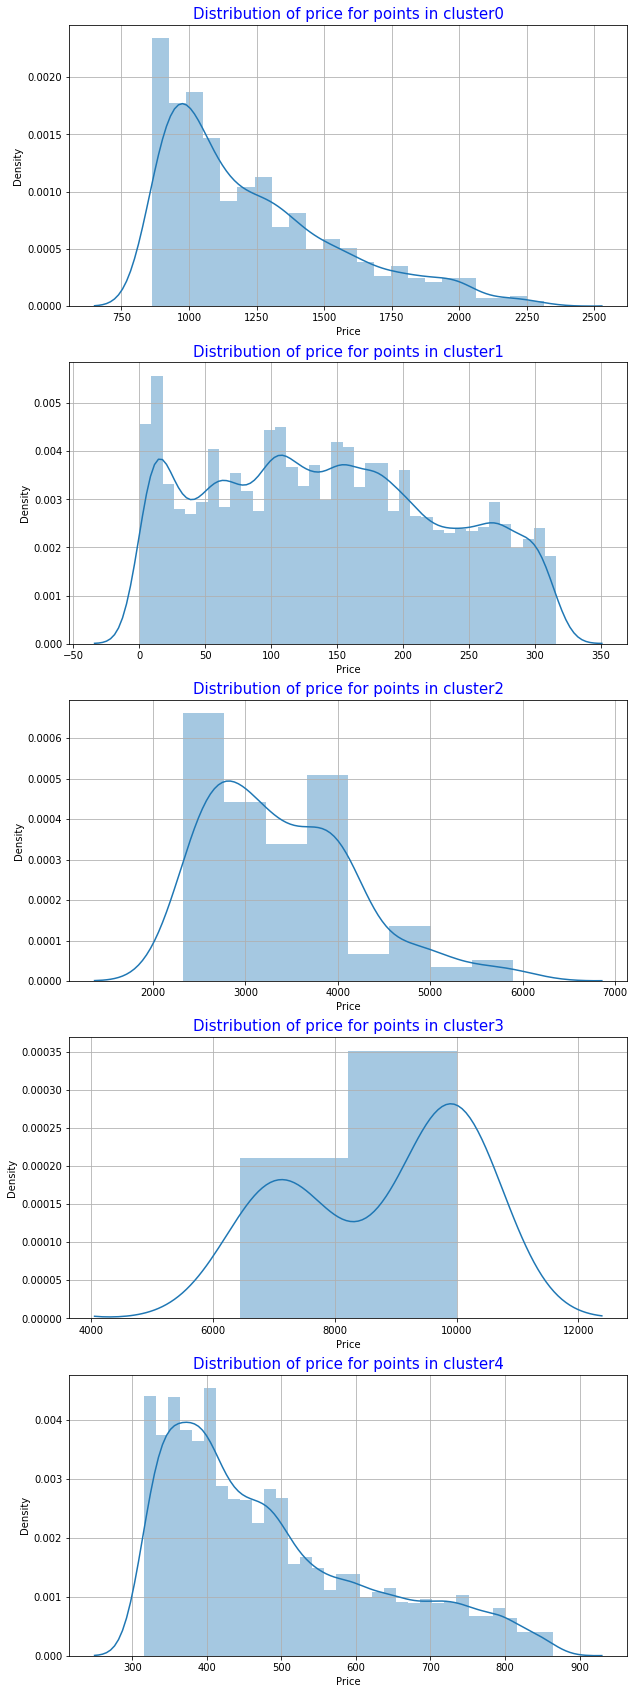

In [8]:
cols = [cluster0['price'],cluster1['price'],cluster2['price'],cluster3['price'],cluster4['price']]
fig, ax = plt.subplots(5, figsize = (10,30))

for i in range(5):
    sns.distplot(cols[i], hist=True, ax=ax[i])
    ax[i].set_title('Distribution of price for points in cluster'+str(i), fontsize=15,color='blue')
    ax[i].set_xlabel('Price')
    ax[i].set_ylabel('Density')
    ax[i].grid(True)

Above five  distribution plots shows the price distribution of projects belonging in each clusters. 
1. First and the top most distplot, shows that all the projects or data points lying in <font color='blue'>Cluster 0</font> have approximate price range of \\$875-\\$2300. Also distribution is left skewed which suggest that most projects have price around \\$900.
2. Second distplot shows that all projects/data points lying in <font color='blue'>Cluster 1</font> have approximate price range of \\$0-\\$320. This cluster contains around 67% data points. Cluster 1 is the largest among all clusters.
3. Third distplot shows that all projects/data points lying in <font color='blue'> Cluster 2</font> have approximate price range of \\$2300-\\$5900. This is very small cluster containing very few data points.
4. Fourth distplot shows that all projects/data points lying in <font color='blue'> Cluster 3</font> have approximate price range of \\$6500-\\$10000. This cluster is also small cluster like the cluster 2.
5. Fith and the last distplot, this plot shows that all projects/data points lying in <font color='blue'> Cluster 4</font> have approximate price range of \\$310-\\$860. Also the distribution is left skewed which suggest that most projects have price around $350.
>After observing price distribution of projects wrt each cluster one very intresting point that can be noted here is that kmeans have put projects with price range **\\$0-\\$320 in cluster 1, \\$310-\\$860 in cluster 4, \\$875-\\$2300 in cluster 0, \\$2300-\\$6000 in cluster 2, and \\$6500-\\$10000 in cluster 3.**

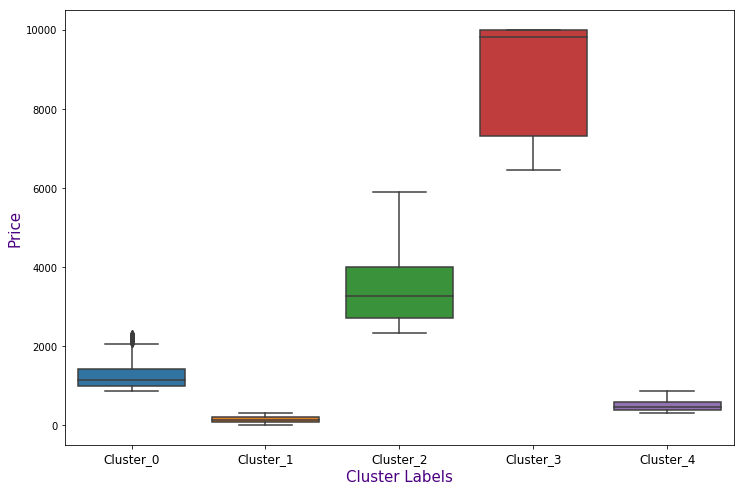

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Label',y='price', data=X)
plt.xticks([0,1,2,3,4],['Cluster_0','Cluster_1','Cluster_2','Cluster_3','Cluster_4'], fontsize=12)
plt.xlabel('Cluster Labels', fontsize = 15, color='Indigo');
plt.ylabel('Price', fontsize = 15, color='Indigo');

Above boxplot shows distribution of price for projects within each clusters. There is not much overlap in the distribution of price wrt each cluster. We can confirm this observation by plotting price distribution in one distplot.

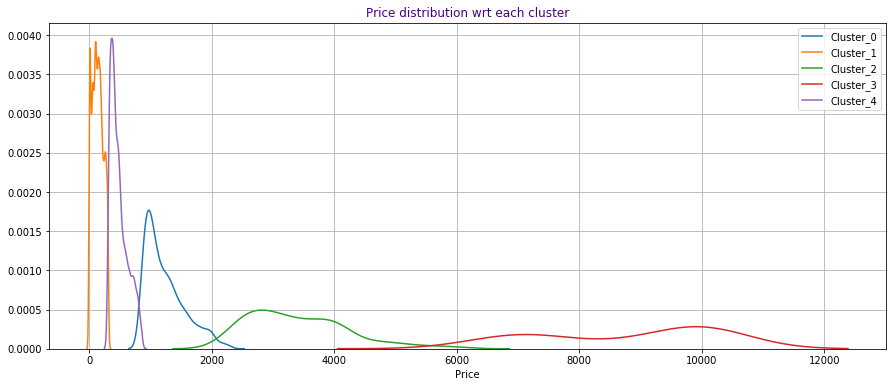

In [10]:
plt.figure(figsize=(15,6))
sns.distplot(cluster0['price'], hist= False, label='Cluster_0')
sns.distplot(cluster1['price'], hist= False, label='Cluster_1')
sns.distplot(cluster2['price'], hist= False, label='Cluster_2')
sns.distplot(cluster3['price'], hist= False, label='Cluster_3')
sns.distplot(cluster4['price'], hist= False, label='Cluster_4')
plt.title('Price distribution wrt each cluster', color='indigo')
plt.xlabel('Price')
plt.grid(True)
plt.legend()
plt.show()

There is not much overlap in the price distribution of projects for all 5 clusters. Hence we can say that price feature plays an important role in clutering of points.
### Analysing teacher_number_of_previously_posted_projects

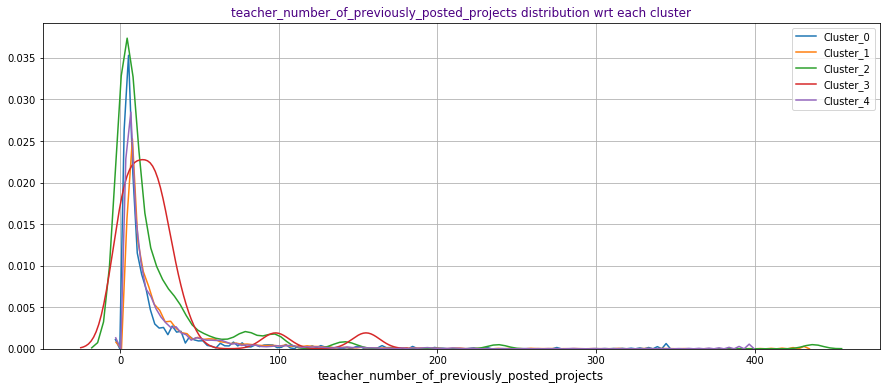

In [11]:
plt.figure(figsize=(15,6))
sns.distplot(cluster0['teacher_number_of_previously_posted_projects'], hist= False, label='Cluster_0')
sns.distplot(cluster1['teacher_number_of_previously_posted_projects'], hist= False, label='Cluster_1')
sns.distplot(cluster2['teacher_number_of_previously_posted_projects'], hist= False, label='Cluster_2')
sns.distplot(cluster3['teacher_number_of_previously_posted_projects'], hist= False, label='Cluster_3')
sns.distplot(cluster4['teacher_number_of_previously_posted_projects'], hist= False, label='Cluster_4')
plt.title('teacher_number_of_previously_posted_projects distribution wrt each cluster', color='indigo')
plt.xlabel('teacher_number_of_previously_posted_projects', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

From above plot, we can see that there is a huge overlap in the distribution of teacher_number_of_previously_posted_projects for each of the cluster. Also all the five distributions are left skewed.

<h3> <font color='indigo'>  2.4.1 Word Cloud with essay text for each cluster.</font></h3>
<br>Generating word cloud: https://www.datacamp.com/community/tutorials/wordcloud-python

In [12]:
#Extracting text from cluster 0
text = " ".join(essay for essay in cluster0['essay'])
print('Number of words in extracted essay text for cluster 0: ', len(text))

Number of words in extracted essay text for cluster 0:  2422664


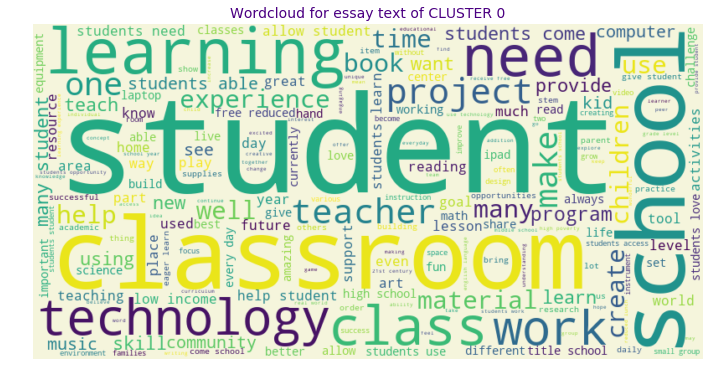

In [13]:
#Generating wordcloud for cluster 0
from PIL import Image
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='beige', width=800, height=400).generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud for essay text of CLUSTER 0', fontdict={'fontsize': 14,'color': 'indigo'})
plt.axis('off');

For **cluster 0**, most frquently occuring words in essay for data points belonging in this cluster are <font color='green'>*student, classroom and school.*

In [14]:
#Extracting text from cluster 1
text = " ".join(essay for essay in cluster1['essay'])
print('Number of words in extracted essay text for cluster 1: ', len(text))

Number of words in extracted essay text for cluster 1:  33750676


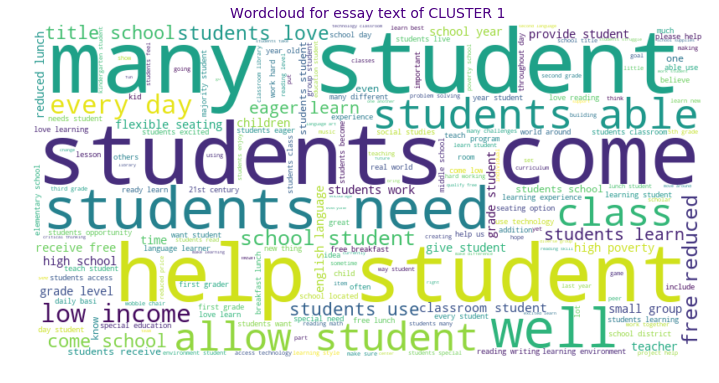

In [15]:
#Generating wordcloud
from PIL import Image
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud for essay text of CLUSTER 1', fontdict={'fontsize': 14,'color': 'indigo'})
plt.axis('off');

For **cluster 1**, most frquently occuring words in essay for data points belonging in this cluster are <font color='green'>*many student, students come and help students.*

In [16]:
#Extracting text from cluster 2
text = " ".join(essay for essay in cluster2['essay'])
print('Number of words in extracted essay text for cluster 2: ', len(text))

Number of words in extracted essay text for cluster 2:  147448


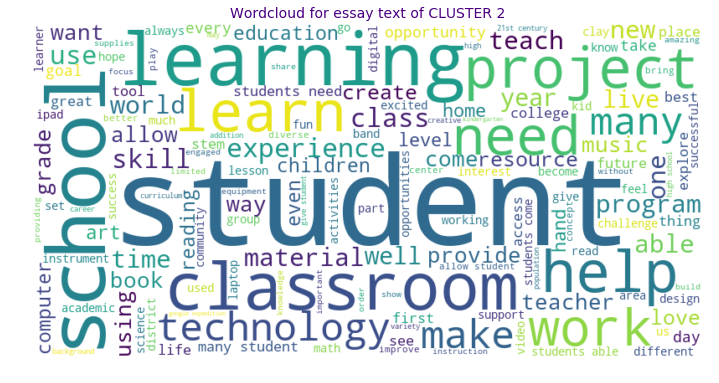

In [17]:
#Generating wordcloud
from PIL import Image
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800,max_words=150, height=400).generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud for essay text of CLUSTER 2', fontdict={'fontsize': 14,'color': 'indigo'})
plt.axis('off');

For **cluster 2**, most frquently occuring words in essay for data points belonging in this cluster are <font color='green'>*student, learning and school.*

In [18]:
#Extracting text from cluster 3
text = " ".join(essay for essay in cluster3['essay'])
print('Number of words in extracted essay text for cluster 3: ', len(text))

Number of words in extracted essay text for cluster 3:  26655


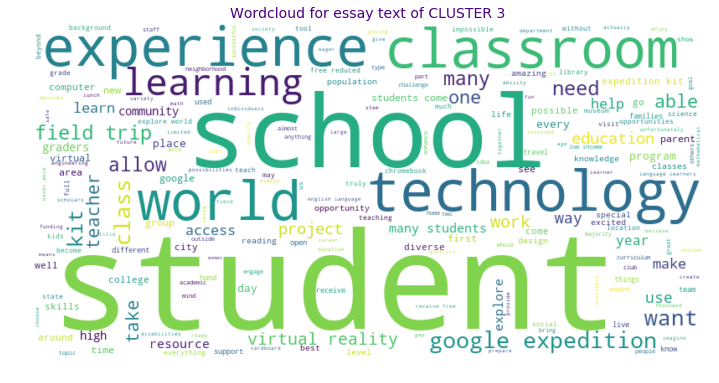

In [19]:
#Generating wordcloud
from PIL import Image
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud for essay text of CLUSTER 3', fontdict={'fontsize': 14,'color': 'indigo'})
plt.axis('off');

For **cluster 3**, most frquently occuring words in essay for data points belonging in this cluster are <font color='green'>*student, school and technology.*

In [20]:
#Extracting text from cluster 4
text = " ".join(essay for essay in cluster4['essay'])
print('Number of words in extracted essay text for cluster 4: ', len(text))

Number of words in extracted essay text for cluster 4:  14076687


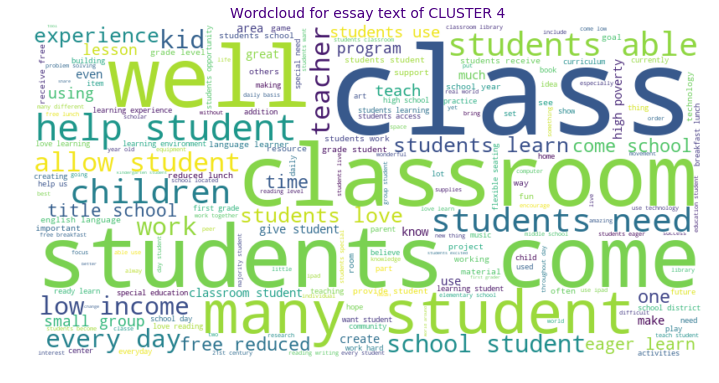

In [21]:
#Generating wordcloud
from PIL import Image
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud for essay text of CLUSTER 4', fontdict={'fontsize': 14,'color': 'indigo'})
plt.axis('off');

For **cluster 4**, most frquently occuring words in essay for data points belonging in this cluster are <font color='green'>*class, students come and classroom.*

## 2.5 Applying Agglomerative Clustering

In [1]:
import pickle

with open('X_train.pickle','rb') as f:
    data = pickle.load(f)

We sample 10k data points as this Agglomerative clustering is computationally expensive. Here data which we have loaded is numpy array, so we will sample on list of integers(indicating indices of rows). Because by using this row indices we can easily map back to original dataframe for later use.

In [2]:
from sklearn.utils import resample
indices = resample(range(0,50000),n_samples = 10000, replace=False)
print(len(indices))

10000


In [3]:
data = data[indices,:].toarray()

In [4]:
data.shape

(10000, 5000)

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

linkage = ['ward','complete','average','single']
score = []
for i in linkage:
    for k in [2,5,7]:
        model = AgglomerativeClustering(n_clusters=k,linkage=i)
        cluster_label = model.fit_predict(data)
        score.append(silhouette_score(data, cluster_label))

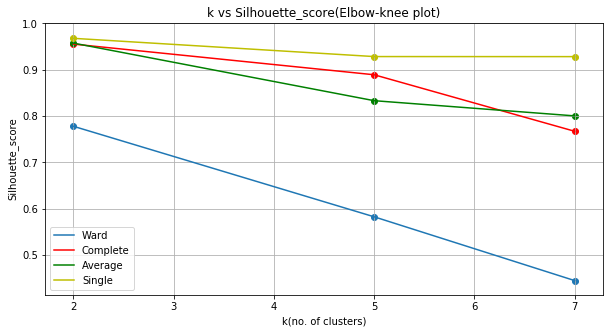

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot([2,5,7], score[:3],label='Ward')
plt.scatter([2,5,7], score[:3])
plt.plot([2,5,7], score[3:6],c='r',label='Complete')
plt.scatter([2,5,7], score[3:6],c='r')
plt.plot([2,5,7], score[6:9],c='g',label='Average')
plt.scatter([2,5,7], score[6:9],c='g')
plt.plot([2,5,7], score[9:],c='y',label='Single')
plt.scatter([2,5,7], score[9:],c='y')
plt.title("k vs Silhouette_score(Elbow-knee plot)")
plt.xlabel('k(no. of clusters)')
plt.ylabel('Silhouette_score')
plt.legend()
plt.grid();

From above plot best number of cluster is 2 and 'single' linkage give best Silhoutte_Score. Range of silhoutte score is [-1, +1] where the +1 score corresponds to maximum inter-clusters distance(suggesting no overlapping points of two clusters).

In [7]:
model = AgglomerativeClustering(n_clusters=2, linkage='single')
label = model.fit_predict(data)

In [8]:
#We will load older session to use the actual dataframe for further steps.
import dill
dill.load_session('kmeans.db')

<h3> <font color='indigo'>  2.5.1 Manually observing few points from each cluster.</h3>

As we have grouped/clustered our data into 2 clusters using AgglomerativeClustering algorithm. Now we will perform some simple exploratory data analysis(EDA) on these grouped data to know what common properties is shared by data points in each clusters.
https://kite.com/blog/python/data-analysis-visualization-python

We will add label predicted by AgglomerativeClustering model to the actual dataset X.

In [9]:
X = X.reset_index().copy() # to avoid SettingWithCopyWarning
X = X.iloc[indices,:] #Selecting only those 10k rows used by our model

In [10]:
X.drop(['index'], axis=1, inplace=True)
X.head()

teacher_prefix school_state project_grade_category  \
39921           Mrs.           TX          Grades PreK-2   
40576            Mr.           VA             Grades 3-5   
6737            Mrs.           LA             Grades 3-5   
29978           Mrs.           SC             Grades 6-8   
9969            Mrs.           WA             Grades 3-5   

                     project_title  \
39921            stem pre k no way   
40576          21st century beyond   
6737          essentials great day   
29978  stand desks mrs brown class   
9969       staying beat xylophones   

                                project_resource_summary  \
39921  students need stem toys encourage develop skil...   
40576  students need chromebooks prepare 21st century...   
6737   students need healthy snacks like granola bars...   
29978  students need stand desks keep active learners...   
9969   students need orff instruments specifically xy...   

       teacher_number_of_previously_posted_projects   price  quantity  \
39921                                             2  463.66        12   
40576                                             2  149.99         6   
6737                                              0  292.12        11   
29978                                             0  235.25         4   
9969                                              2  468.27         6   

         clean_categories          clean_subcategories  \
39921        Math_Science  AppliedSciences Mathematics   
40576   Literacy_Language  Literacy Literature_Writing   
6737   Warmth Care_Hunger           Warmth Care_Hunger   
29978        Math_Science                  Mathematics   
9969           Music_Arts                        Music   

                                                   essay  
39921  play often talked relief serious learning chil...  
40576  students walk classroom day ready learn eager ...  
6737   teach international baccalaureate school teach...  
29978  115 middle school students ages 11 14 many stu...  
9969   student range second fourth grade small school...

In [11]:
X['Label'] = label   # Appending cluster label as new column

In [12]:
#Separating/creating a new dataframe to store all clusters separately
cluster0 = X.loc[X.Label==0,:]
cluster1 = X.loc[X.Label==1,:]

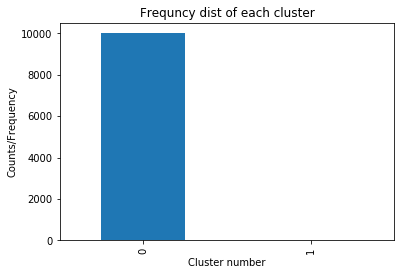

In [13]:
#Counting number of data points belonging to each clusters and creation bat plot.
X['Label'].value_counts().plot.bar(title = 'Frequncy dist of each cluster')
plt.xlabel('Cluster number')
plt.ylabel('Counts/Frequency')
plt.show()

From the bar plot, most of the data point/ observations belong to cluster 1. Also it seems like no points belong to cluster 2 and cluster 3. Hence we will see at the numerical count wrt to each cluster.

In [14]:
pd.DataFrame([X['Label'].value_counts(),X['Label'].value_counts(normalize=True)],index=['count','proportion'])

0       1
count       9998.0000  2.0000
proportion     0.9998  0.0002

Very few proportion of points belong to cluster 1(0.02%) i.e only 2 points belong to cluster 1.
### Analysing price

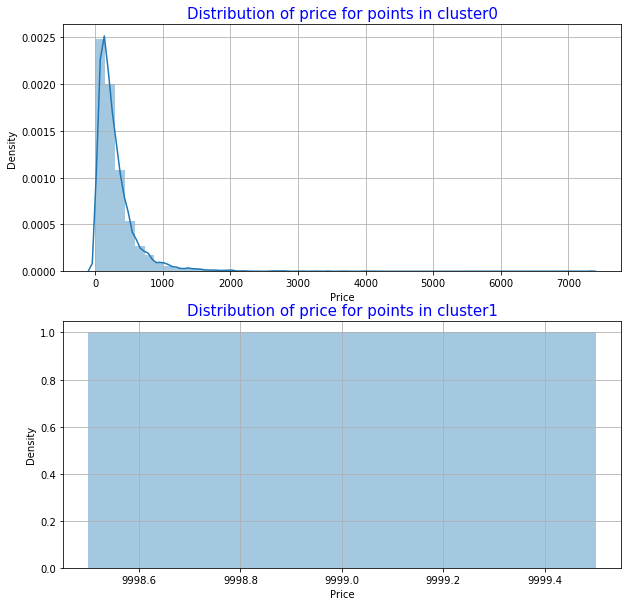

In [16]:
cols = [cluster0['price'],cluster1['price']]
fig, ax = plt.subplots(2, figsize = (10,10))

for i in range(2):
    sns.distplot(cols[i], hist=True, ax=ax[i])
    ax[i].set_title('Distribution of price for points in cluster'+str(i), fontsize=15,color='blue')
    ax[i].set_xlabel('Price')
    ax[i].set_ylabel('Density')
    ax[i].grid(True)

Above two  distribution plots shows the price distribution of projects belonging in each clusters. 
1. First and the top most distplot, shows that all the projects or data points lying in <font color='blue'>Cluster 0</font> have approximate price range of \\$0-\\$7000. Also distribution is left skewed which suggest that most projects have price around \\$225.
2. Second and the last distplot, this plot shows that all projects/data points lying in <font color='blue'> Cluster 1</font>. As this cluster contains only 2 data points where price is around \\$9998-\\$10000. 
>After observing price distribution of projects wrt each cluster one very intresting point that can be noted here is that AgglomerativeClustering have put projects with price range **\\$0-\\$7000 in cluster 0 and projects having price greater than \\$9998 in cluster 1.**

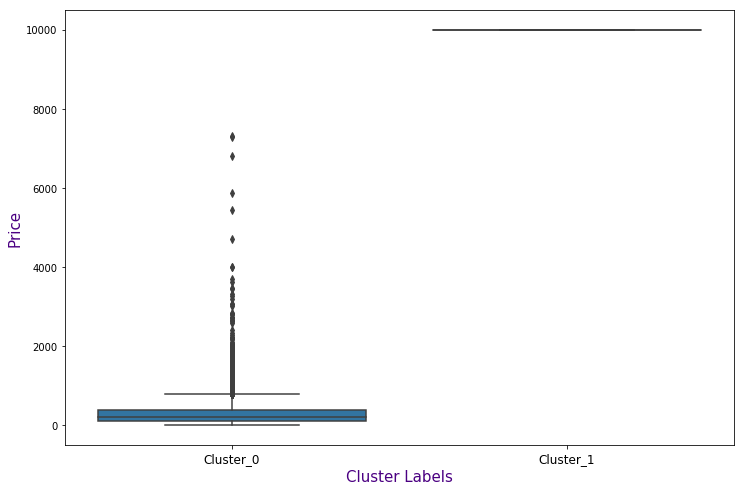

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Label',y='price', data=X)
plt.xticks([0,1],['Cluster_0','Cluster_1'], fontsize=12)
plt.xlabel('Cluster Labels', fontsize = 15, color='Indigo');
plt.ylabel('Price', fontsize = 15, color='Indigo');

Above boxplot shows distribution of price for projects within each clusters. There is not much overlap in the distribution of price wrt each cluster. 

### Analysing teacher_number_of_previously_posted_projects

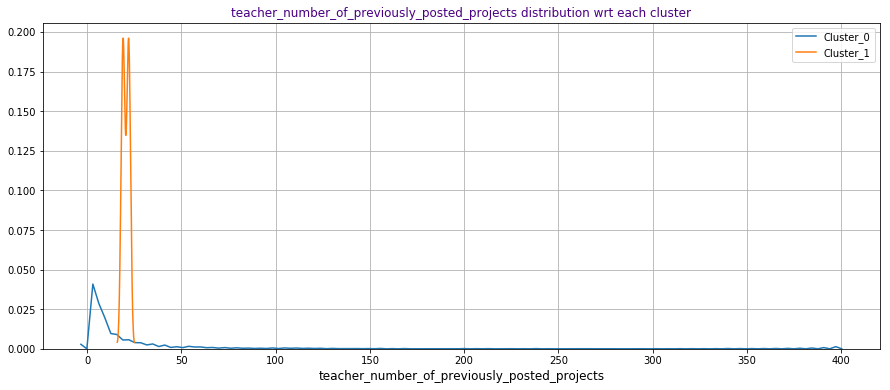

In [18]:
plt.figure(figsize=(15,6))
sns.distplot(cluster0['teacher_number_of_previously_posted_projects'], hist= False, label='Cluster_0')
sns.distplot(cluster1['teacher_number_of_previously_posted_projects'], hist= False, label='Cluster_1')
plt.title('teacher_number_of_previously_posted_projects distribution wrt each cluster', color='indigo')
plt.xlabel('teacher_number_of_previously_posted_projects', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

From above plot, we can see two spikes in the distribution of teacher_number_of_previously_posted_projects for cluster 1(as it contains only 2 observation). Also for cluster 0 the distribution is left skewed i.e most projects have number of previously projects within 0-25. We cannot conclude much from this distribution plot.

### Analysing Quantity

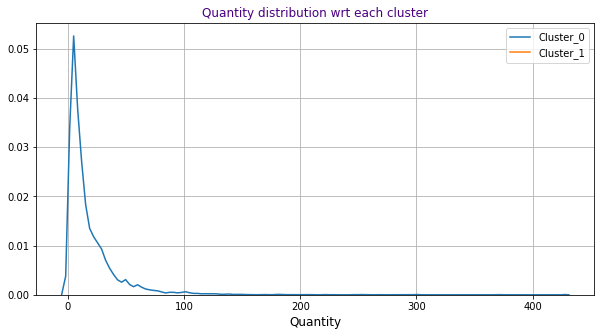

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(cluster0['quantity'], hist= False, label='Cluster_0')
sns.distplot(cluster1['quantity'], hist= False, label='Cluster_1')
plt.title('Quantity distribution wrt each cluster', color='indigo')
plt.xlabel('Quantity', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

From above distplot, distribution of quantities is visible only for cluster 0 which is left skewed indicating that most projects require resource quantity in range 0 to 50. And the reason for not seeing PDF of quantity for cluster 1 might be having only 2 points and both having same number of quantity.

In [22]:
X.loc[X.Label==1,'quantity']

19850    1
3884     1
Name: quantity, dtype: int64

<h3> <font color='indigo'>  2.5.2 Word Cloud with essay text for each cluster.</font></h3>
<br>Generating word cloud: https://www.datacamp.com/community/tutorials/wordcloud-python

In [23]:
#Extracting text from cluster 0
text = " ".join(essay for essay in cluster0['essay'])
print('Number of words in extracted essay text for cluster 0: ', len(text))

Number of words in extracted essay text for cluster 0:  10083902


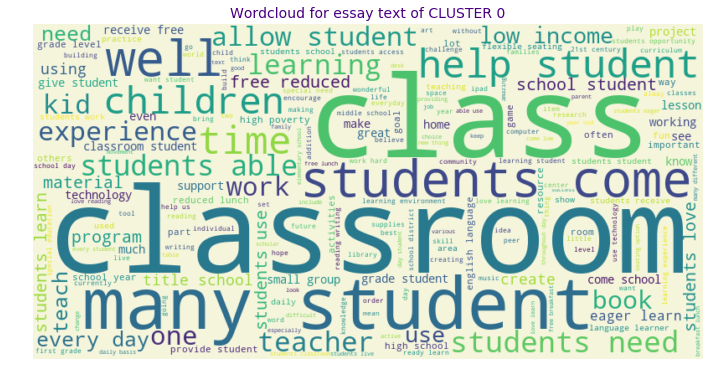

In [24]:
#Generating wordcloud for cluster 0
from PIL import Image
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='beige', width=800, height=400).generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud for essay text of CLUSTER 0', fontdict={'fontsize': 14,'color': 'indigo'})
plt.axis('off');

For **cluster 0**, most frquently occuring words in essay for data points belonging in this cluster are <font color='green'>*class, classroom and many student.*

In [25]:
#Extracting text from cluster 1
text = " ".join(essay for essay in cluster1['essay'])
print('Number of words in extracted essay text for cluster 1: ', len(text))

Number of words in extracted essay text for cluster 1:  3531


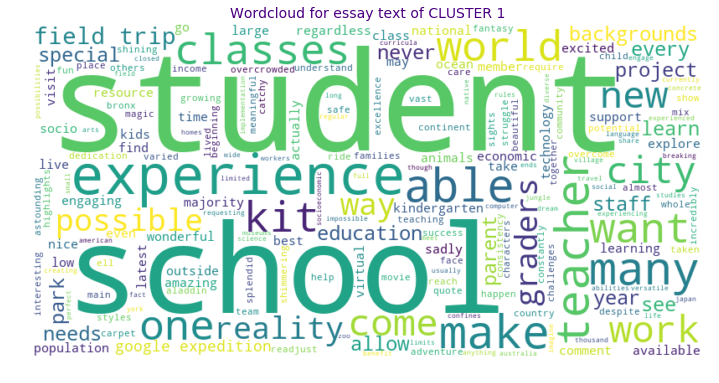

In [26]:
#Generating wordcloud
from PIL import Image
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud for essay text of CLUSTER 1', fontdict={'fontsize': 14,'color': 'indigo'})
plt.axis('off');

For **cluster 1**, most frquently occuring words in essay for data points belonging in this cluster are <font color='green'>*student, school and experrience.*

## 2.6 Applying  DBSCAN

In [1]:
import pickle

with open('X_train.pickle','rb') as f:
    data = pickle.load(f)

We sample 10k data points as this DBSCAN algorithm is computationally expensive. Here data which we have loaded is numpy array, so we will sample on list of integers(indicating indices of rows). Because by using this row indices we can easily map back to original dataframe for later use.

In [2]:
from sklearn.utils import resample
indices = resample(range(0,50000),n_samples = 10000, replace=False, random_state=20)
print(len(indices))

10000


In [3]:
data = data[indices,:].toarray()

In [4]:
data.shape

(10000, 5000)

In DBSCAN, we have two main hyperparameters min_samples and eps. As a rule of thumb, min_samples>=d+1, where d is the dimension of data. Hence,we will fix min_samples=5078. Then we only have to tune hyperparameter eps. Process to follow for finding best eps:
1. For each point/observation x_i in dataset we will find distance(x_i, 5078th nearest neighbour of x_i). Let's denote this distance as d_i.
2. Sort d_i in increasing order.
3. Then, plot point_indices vs sorted d_i. By observing that plot, wherever we find sudden inflection in the curve that value of d_i is chosen as best eps.

In [5]:
#We will use sklearn's NearestNeighbors to find distance/proximity matrix for data points.
#https://scikit-learn.org/stable/modules/neighbors.html
min_samples= 5078
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors= min_samples)
nn.fit(data)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5078, p=2,
         radius=1.0)

In [6]:
distances, _ = nn.kneighbors(data)
print(distances.shape)

(10000, 5078)


In [7]:
import numpy as np
sorted_d_i = np.sort(distances[:,-1])

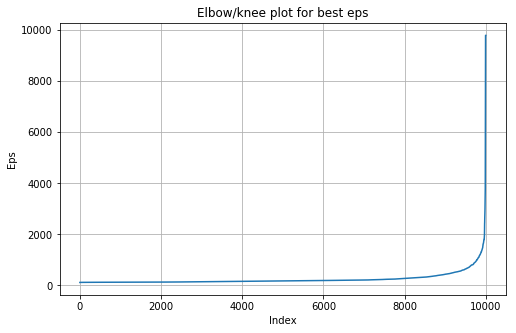

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (8,5))
plt.plot(range(10000), sorted_d_i)
#plt.scatter(range(10000), sorted_d_i)
plt.xlabel('Index')
plt.ylabel('Eps')
plt.title('Elbow/knee plot for best eps')
plt.grid();

From above plot best eps is somewhere in range 0 to 2000(sudden inflection seen here), so we will zoomin above plot for the eps<2000 to find best eps.

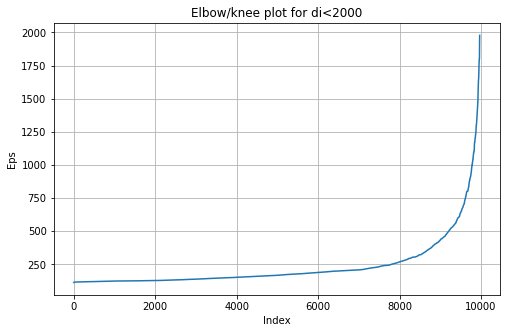

In [9]:
eps_2000 = sorted_d_i[sorted_d_i<2000]
plt.figure(figsize = (8,5))
plt.plot(range(len(eps_2000)),eps_2000)
plt.xlabel('Index')
plt.ylabel('Eps')
plt.title('Elbow/knee plot for di<2000')
plt.grid();

After zooming in to for value of eps(d_i)<2000, best eps is at 500. Hence we will fix eps= 500.

In [10]:
from sklearn.cluster import DBSCAN
model = DBSCAN(min_samples=5078, eps=500, n_jobs=-1)
label = model.fit_predict(data)

In [11]:
#We will load older session to use the actual dataframe for further steps.
import dill
dill.load_session('kmeans.db')

<h3> <font color='indigo'>  2.6.1 Manually observing few points from each cluster.</h3>

As we have grouped/clustered our data into clusters using DBSCAN algorithm. Now we will perform some simple exploratory data analysis(EDA) on these grouped data to know what common properties is shared by data points in each clusters.
https://kite.com/blog/python/data-analysis-visualization-python
DBSCAN labels noise point as -1.

We will add label predicted by DBSCAN model to the actual dataset X.

In [12]:
X = X.reset_index().copy() # to avoid SettingWithCopyWarning
X = X.iloc[indices,:] #Selecting only those specific 10k rows used by our model

In [13]:
X.drop(['index'], axis=1, inplace=True)
X.head()

teacher_prefix school_state project_grade_category  \
18991           Mrs.           UT             Grades 3-5   
41632           Mrs.           OH             Grades 3-5   
36306            Ms.           PA            Grades 9-12   
26881            Ms.           NC             Grades 6-8   
3469            Mrs.           NY          Grades PreK-2   

                           project_title  \
18991                       mustang math   
41632                standing successful   
36306         statistics class materials   
26881                     whatever works   
3469   moving wobble chairs fitpro balls   

                                project_resource_summary  \
18991  students need items requested help manage diff...   
41632  students need flexibility choose different sea...   
36306  students need materials help make statistics c...   
26881        students need opportunity move around learn   
3469   students need fitpro balls wobble chairs move ...   

       teacher_number_of_previously_posted_projects   price  quantity  \
18991                                             3  528.00         2   
41632                                             1  267.29         2   
36306                                             1  289.67        14   
26881                                             0  690.75         7   
3469                                              2   79.44        15   

                clean_categories          clean_subcategories  \
18991  Math_Science SpecialNeeds     Mathematics SpecialNeeds   
41632              Health_Sports              Health_Wellness   
36306               Math_Science                  Mathematics   
26881          Literacy_Language  Literacy Literature_Writing   
3469               Health_Sports              Health_Wellness   

                                                   essay  
18991  yeehaw teacher best grade third remember third...  
41632  teach inner city title school students receivi...  
36306  students faced trouble lives every day still c...  
26881  hi 6th grade language arts teacher rutherford ...  
3469   classroom consists 20 kindergarten students ye...

In [14]:
X['Label'] = label   # Appending cluster label as new column

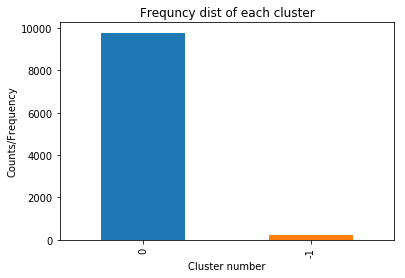

In [15]:
#Counting number of data points belonging to each clusters and creation bat plot.
X['Label'].value_counts().plot.bar(title = 'Frequncy dist of each cluster')
plt.xlabel('Cluster number')
plt.ylabel('Counts/Frequency')
plt.show()

From the bar plot, most of the data point/ observations are clustered in one group i.e cluster 0. And the point belonging to cluter -1 are noisy data, since DBSCAN algorithm is efficient in combating noise. 

In [16]:
pd.DataFrame([X['Label'].value_counts(),X['Label'].value_counts(normalize=True)],index=['count','proportion'])

0        -1
count       9778.0000  222.0000
proportion     0.9778    0.0222

After applying DBSCAN on our data around 2.22% of data is labeled as noisy data. Rest of the data points are clutered in one cluster.
### Analysing price

In [17]:
#Separating/creating a new dataframe to store all cluster an noise separately
cluster0 = X.loc[X.Label==0,:]
noise = X.loc[X.Label==-1,:]

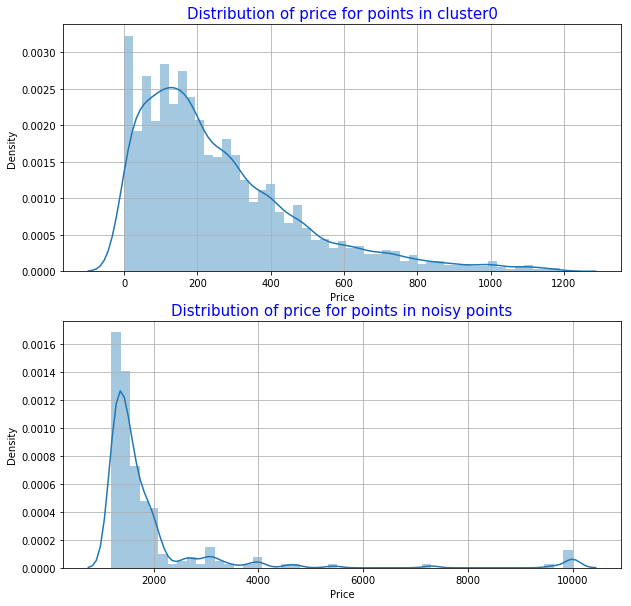

In [18]:
cols = [cluster0['price'],noise['price']]
title = ['cluster0', 'noisy points']
fig, ax = plt.subplots(2, figsize = (10,10))

for i in range(2):
    sns.distplot(cols[i], hist=True, ax=ax[i])
    ax[i].set_title('Distribution of price for points in '+title[i] , fontsize=15,color='blue')
    ax[i].set_xlabel('Price')
    ax[i].set_ylabel('Density')
    ax[i].grid(True)

Above two  distribution plots shows the price distribution of projects belonging in clusters0 and noisy data. 
1. First and the top most distplot, shows that all the projects or data points lying in <font color='blue'>Cluster 0</font> have approximate price range of \\$0-\\$1200. Also distribution is left skewed which suggest that most projects have price around \\$0 to \\$200.
2. Second and the last distplot, this plot shows that all projects/data points that are labeled by DBSCAN algorithm as noisy data points. These <font color='blue'> Noisy data</font> has price range around \\$1000-\\$10000. This distribution is left skewed as most noisy data has price around \\$1000.

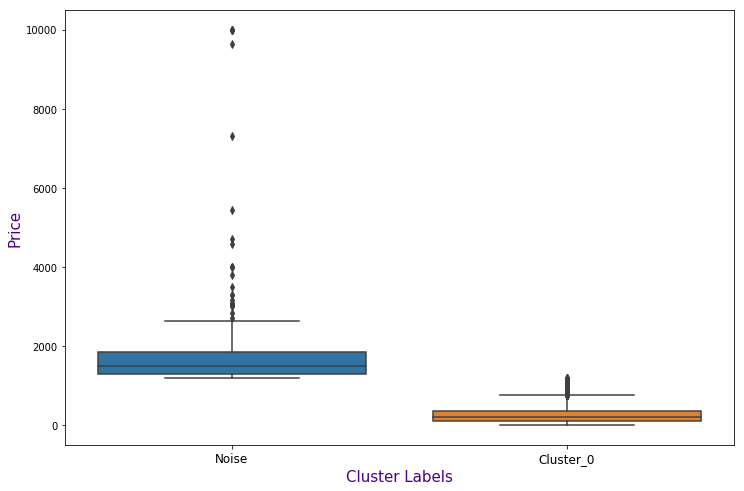

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Label',y='price', data=X)
plt.xticks([1,0],['Cluster_0','Noise'], fontsize=12)
plt.xlabel('Cluster Labels', fontsize = 15, color='Indigo');
plt.ylabel('Price', fontsize = 15, color='Indigo');

Above boxplot shows distribution of price for projects within clusters0 and noise. There is not much overlap in the distribution of price wrt each cluster. 

### Analysing teacher_number_of_previously_posted_projects

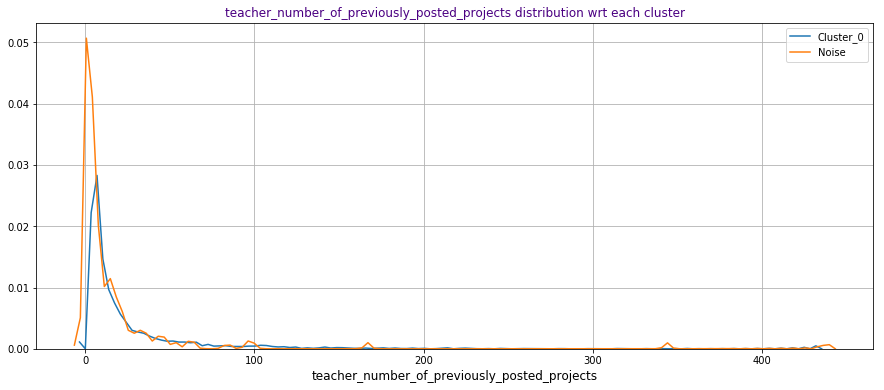

In [20]:
plt.figure(figsize=(15,6))
sns.distplot(cluster0['teacher_number_of_previously_posted_projects'], hist= False, label='Cluster_0')
sns.distplot(noise['teacher_number_of_previously_posted_projects'], hist= False, label='Noise')
plt.title('teacher_number_of_previously_posted_projects distribution wrt each cluster', color='indigo')
plt.xlabel('teacher_number_of_previously_posted_projects', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

From above plot, we can see high overlap in the both distribution. But one point can be noted here is that in noisy data, density of teacher_number_of_previously_posted_projects is high in range 0 to 25 as compared to cluster 0 data.

### Analysing Quantity

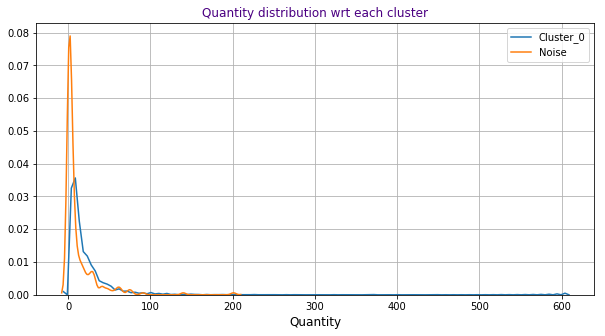

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(cluster0['quantity'], hist= False, label='Cluster_0')
sns.distplot(noise['quantity'], hist= False, label='Noise')
plt.title('Quantity distribution wrt each cluster', color='indigo')
plt.xlabel('Quantity', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

By observing distribution of quantities wrt cluster 0 and noisy data, we observe that both distribution are overlapping. But in range 0 to 20, more number of observations from noisy cluster lie in this range as compared to cluster0. 

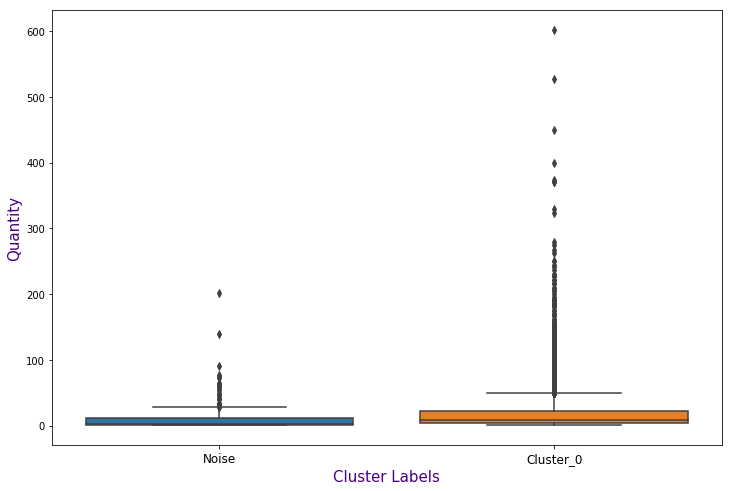

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Label',y='quantity', data=X)
plt.xticks([1,0],['Cluster_0','Noise'], fontsize=12)
plt.xlabel('Cluster Labels', fontsize = 15, color='Indigo');
plt.ylabel('Quantity', fontsize = 15, color='Indigo');

By looking at above boxplot and previous distplot for quantity wrt closter0 and noisy data, we can conclude that noisy data has quantity requirement in range 0 to 200, but in cluster 0 quantity requirement is from 0 to 600.

<h3> <font color='indigo'>  2.6.2 Word Cloud with essay text for each cluster.</font></h3>
<br>Generating word cloud: https://www.datacamp.com/community/tutorials/wordcloud-python

In [23]:
#Extracting text from cluster 0
text = " ".join(essay for essay in cluster0['essay'])
print('Number of words in extracted essay text for cluster 0: ', len(text))

Number of words in extracted essay text for cluster 0:  9817166


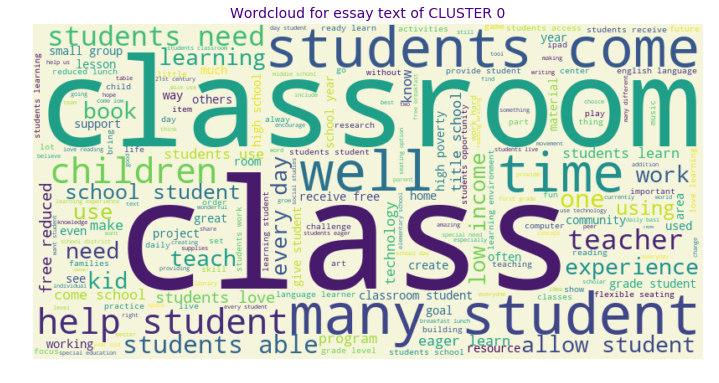

In [24]:
#Generating wordcloud for cluster 0
from PIL import Image
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='beige', width=800, height=400).generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud for essay text of CLUSTER 0', fontdict={'fontsize': 14,'color': 'indigo'})
plt.axis('off');

For **cluster 0**, most frquently occuring words in essay for data points belonging in this cluster are <font color='green'>*class, classroom and many student.*

In [25]:
#Extracting text from noisy data
text = " ".join(essay for essay in noise['essay'])
print('Number of words in extracted essay text for noise data: ', len(text))

Number of words in extracted essay text for noise data:  239958


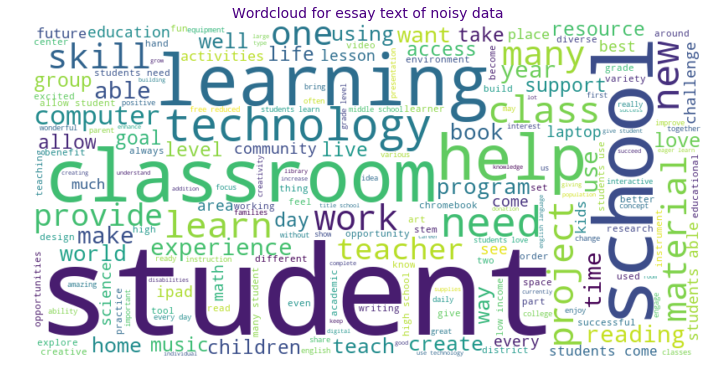

In [26]:
#Generating wordcloud
from PIL import Image
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud for essay text of noisy data', fontdict={'fontsize': 14,'color': 'indigo'})
plt.axis('off');

For **noisy data**, most frquently occuring words in essay for data points belonging in this cluster are <font color='green'>*student, classroom, help, school and learning.*

## 2.7 Conclusion

From Donor's choose data set we created sample and then applied all three types of clustering algorithm viz. KMeans(centroid based), Agglomerative(Hierarchical clustering) and DBSCAN(Density based clustering).
Together with applying each clustering algorithm, we have analyzed each cluster manually and plotted word cloud of essay for each cluster. 

In [27]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names= ['Clustering techique','Sample size','Hyperparameter(s)', '# of clusters']

In [28]:
x.add_row(['KMeans',50000, 'n_clusters: 5', 5])
x.add_row(['Agglomerative',10000, 'n_clusters: 2 | linkage: single', 2])
x.add_row(['DBSCAN',10000, 'eps: 500 | min_samples: 5078', 1])

In [29]:
print(x)

+---------------------+-------------+---------------------------------+---------------+
| Clustering techique | Sample size |        Hyperparameter(s)        | # of clusters |
+---------------------+-------------+---------------------------------+---------------+
|        KMeans       |    50000    |          n_clusters: 5          |       5       |
|    Agglomerative    |    10000    | n_clusters: 2 | linkage: single |       2       |
|        DBSCAN       |    10000    |   eps: 500 | min_samples: 5078  |       1       |
+---------------------+-------------+---------------------------------+---------------+


**Observation**:
1. After analysing all the cluster formed by using three clustering techniques, price seems to be a crucial feature for grouping data points in various clusters.
2. For both Agglomerative and DBSCAN clustering we got one big cluster, and other cluster contained only few points and in DBSCAN these few points are labeled as noisy whereas in Agglomerative these are labeled as cluster 1. 
3. In DBSCAN, we get best eps = 500 choosen from elbow-knee plot by keeping min_samples fixed to 5078. To select min_samples we followed rule of thumb i.e min_samples>=d+1 where d is the dimension of dataset.